In [1]:
import numpy as np
import cv2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people


In [4]:
# Step 1: Load the LFW dataset (this will download the dataset if not already available)
lfw_dataset = fetch_lfw_people(min_faces_per_person=36, resize=0.4)
faces = lfw_dataset.data
labels = lfw_dataset.target
n_samples, n_features = faces.shape

In [5]:


# Step 2: Compute the mean face
mean_face = np.mean(faces, axis=0)

# Step 3: Subtract the mean face from each image
faces_centered = faces - mean_face

# Step 4: Compute the covariance matrix
cov_matrix = np.cov(faces_centered, rowvar=False)

# Step 5: Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)


In [6]:

# Step 6: Sort the eigenvectors by eigenvalues in descending order
eigen_pairs = [(eigenvalues[i], eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(reverse=True, key=lambda x: x[0])




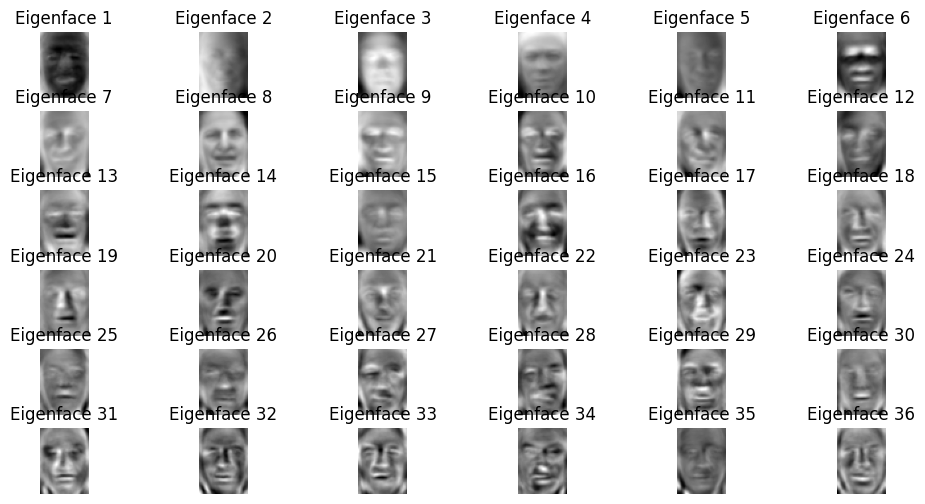

In [7]:

# Step 7: Select the top-k eigenvectors to form the eigenfaces
k = 36  # Number of eigenfaces to keep
selected_eigenvectors = np.array([pair[1] for pair in eigen_pairs[:k]])

# Display the top-k eigenfaces
plt.figure(figsize=(12, 6))
for i in range(k):
    plt.subplot(6, 6, i + 1)
    plt.imshow(selected_eigenvectors[i].reshape(50, 37), cmap='gray')
    plt.title(f'Eigenface {i + 1}')
    plt.axis('off')
plt.show()


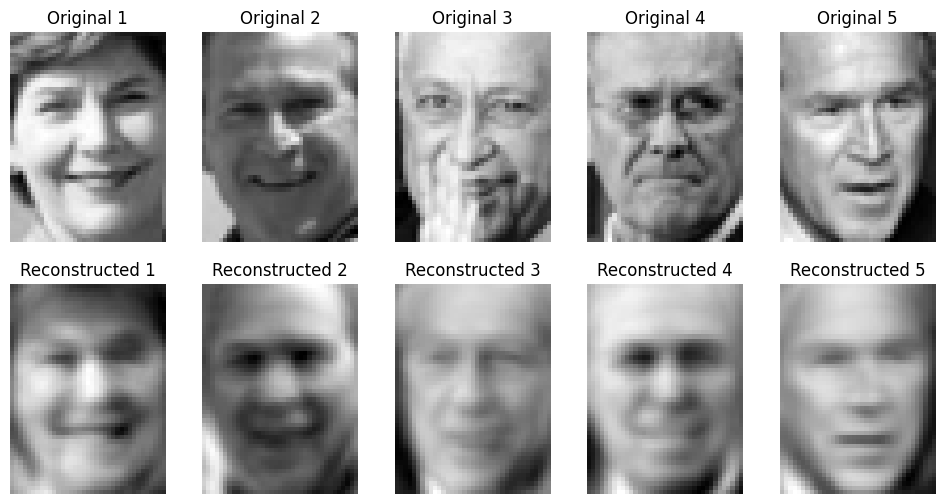

In [8]:

# Step 8: Project the original images onto the eigenfaces to obtain the feature vectors
feature_vectors = np.dot(faces_centered, selected_eigenvectors.T)

# Visualize original images and reconstructed images
num_images_to_visualize = 5  # Change this to the number of images you want to visualize
plt.figure(figsize=(12, 6))
for i in range(num_images_to_visualize):
    # Original image
    plt.subplot(2, num_images_to_visualize, i + 1)
    plt.imshow(faces[i].reshape(50, 37), cmap='gray')
    plt.title(f'Original {i + 1}')
    plt.axis('off')

    # Reconstructed image
    reconstructed_image = np.dot(feature_vectors[i], selected_eigenvectors) + mean_face
    plt.subplot(2, num_images_to_visualize, i + 1 + num_images_to_visualize)
    plt.imshow(reconstructed_image.reshape(50, 37), cmap='gray')
    plt.title(f'Reconstructed {i + 1}')
    plt.axis('off')
plt.show()